In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# sklearn preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# ml algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# sklearn libraries for evaluating models
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# import input data
df_final = pd.read_csv('final_df.csv') # inputs
df_final.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.10583,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.10583,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.10583,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# we've imported our final dataset
# Now let's seperate the target and feature and start building our models

target = df_final['Happiness Rank']
inputs = df_final.drop('Happiness Rank', axis = 1)

In [4]:
# If we see the dataframe then we can see that some values are very low and some are high. 
# We need to scale the new_dataset

scale = StandardScaler()
data = scale.fit_transform(inputs)

In [5]:
# Let's split the dataset into train and test set

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state= 101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(122, 9) (31, 9) (122,) (31,)


Now Let's apply Machine Learning on this train dataset and evaluate with test data.
First let's apply 
#### Linear Regression

In [6]:
# Linear Regression
lin_reg = LinearRegression() # creating Instances
lin_reg.fit(x_train, y_train) # fitting train & test data

# prediction 
y_pred = lin_reg.predict(x_test) # making prediction with the model

In [7]:

# evaluation model performance

lin_score = r2_score(y_test, y_pred)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print('r2_score: {}'.format(lin_score))
print('Mean Absolute Error: {}'.format(lin_mae))
print('Mean Squared Error: {}'.format(lin_mse))
print('Root Mean Squared Error: {}'.format(lin_rmse))

r2_score: 0.9810695448557768
Mean Absolute Error: 4.268734656464899
Mean Squared Error: 27.628615158253524
Root Mean Squared Error: 5.2562929102413545


Here we've  r2_score of 0.98 and the Root Means Squared Error(RMSE) which is 5.25

It means that our model is performing very well in this case.Let's use some other algorithm

#### Decision Tree Regressor

In [8]:
# decision tree
d_tree = DecisionTreeRegressor(max_depth=12)  # creating Instances
d_tree.fit(x_train, y_train) # fitting train & test data
d_pred = d_tree.predict(x_test) # making prediction with the model

In [9]:
# evaluation model performance

tree_score = r2_score(y_test, d_pred)
tree_mae = mean_absolute_error(y_test, d_pred)
tree_mse = mean_squared_error(y_test, d_pred)
tree_rmse = np.sqrt(tree_mse)

print('r2_score: {}'.format(tree_score))
print('Mean Absolute Error: {}'.format(tree_mae))
print('Mean Squared Error: {}'.format(tree_mse))
print('Root Mean Squared Error: {}'.format(tree_rmse))

r2_score: 0.9956237166324435
Mean Absolute Error: 2.193548387096774
Mean Squared Error: 6.387096774193548
Root Mean Squared Error: 2.5272706175226958


Here the r2_score is almost 1 which indicated that the output is completely explained by the predictors. and the RMSE is very low which means the algorithm is performing very well.

Let's use one more algorithm

#### Random Forest Regression

In [10]:
# random forest
r_forest = RandomForestRegressor(max_depth = 12) # creating Instances
r_forest.fit(x_train, y_train) # fitting train & test data
rf_pred = r_forest.predict(x_test) # making prediction with the model

In [11]:
# evaluation model performance
rf_score = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print('r2_score: {}'.format(rf_score))
print('Mean Absolute Error: {}'.format(rf_mae))
print('Mean Squared Error: {}'.format(rf_mse))
print('Root Mean Squared Error: {}'.format(rf_rmse))

r2_score: 0.9976422684947525
Mean Absolute Error: 1.553870967741936
Mean Squared Error: 3.4410612903225837
Root Mean Squared Error: 1.8550097817323183


Like DecisionTreeRegressor the RandomForestRegressor also perform very well. & in this case the RMSE is also very low than DecisionTreeRegressor..

So this gonna our final model.

In [12]:
d = {'Actual': y_test, 'Predicted': rf_pred}
predicted_result = pd.DataFrame(data = d)

predicted_result['Error'] = predicted_result['Actual'] - predicted_result['Predicted']
predicted_result.head()

,Actual,Predicted,Error
33,35,33.13,1.87
16,18,18.57,-0.57
121,124,124.91,-0.91
116,119,121.37,-2.37
78,81,81.75,-0.75


In [13]:
predicted_result.columns

Index(['Actual', 'Predicted', 'Error'], dtype='object')

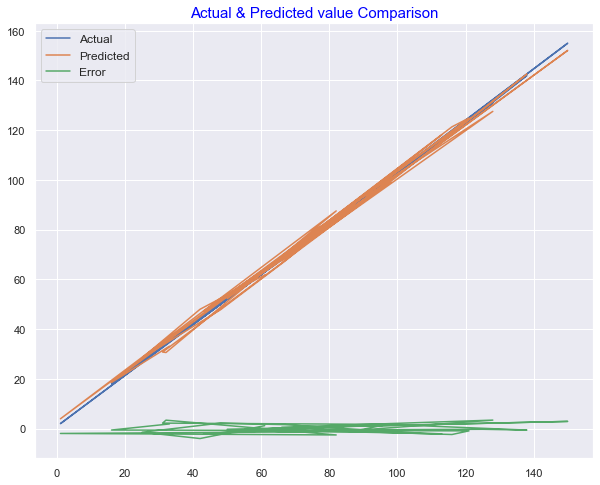

In [14]:
# Now let's plot a graph to see the result visually
plt.figure(figsize = (10,8))
plt.plot(predicted_result['Actual'], label = 'Actual')
plt.plot(predicted_result['Predicted'], label = 'Predicted')
plt.plot(predicted_result['Error'], label = 'Error')

plt.title('Actual & Predicted value Comparison', fontdict={'fontsize':15, 'color': 'blue'})
plt.legend(fontsize = 'medium')
plt.show()

Here we can see that the model almost perfectly predicted. And just have very little error ploted at the bottom of the graph.